In [1]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt'''


In [2]:
'''# Define paths
train_dir = r"C:\Users\asus\Desktop\MiniProject4\dataset\train"
validation_dir = r"C:\Users\asus\Desktop\MiniProject4\dataset\validation"

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')'''


Found 2040 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [3]:
'''model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 categories: bette, gotu, kole
])
'''

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
'''model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)'''


In [5]:
'''early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def lr_scheduler(epoch, lr):
    return lr * 0.95

callbacks = [early_stopping, LearningRateScheduler(lr_scheduler)]'''


In [1]:
'''history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks
)'''


'history = model.fit(\n    train_generator,\n    validation_data=validation_generator,\n    epochs=10,\n    callbacks=callbacks\n)'

In [9]:
'''# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
model.save('./arecanut_cnn_model.h5')'''



10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5549 - loss: 2.4803


Test Accuracy: 0.54


In [2]:
'''plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''


"plt.plot(history.history['accuracy'], label='Training Accuracy')\nplt.plot(history.history['val_accuracy'], label='Validation Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

In [10]:
'''from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a new image
img_path = r'C:\Users\asus\Desktop\MiniProject4\dataset\test\image4.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
class_indices = train_generator.class_indices
categories = {v: k for k, v in class_indices.items()}

# Print predictions
for category, score in zip(categories.values(), predictions[0]):
    print(f"{category}: {score:.2%}")'''


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Good Quality: 2.21%
Kari Gotu: 86.74%
Ulli: 11.05%


In [11]:
'''import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img):
    # Preprocess the image for model input
    img = img.resize((224, 224))  # Resize image to the input size expected by the model
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if needed

    # Load the model (make sure you load the correct model file)
    model = tf.keras.models.load_model('arecanut_cnn_model.h5')

    # Make prediction
    prediction = model.predict(img_array)
    # Assuming prediction returns probabilities for each class
    return {'Class 1': prediction[0][0], 'Class 2': prediction[0][1]}  # Adjust based on model output'''


In [1]:
''''import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
from tensorflow.keras.preprocessing import image

# Define image dimensions
image_height = 128  # Height of the input images
image_width = 128   # Width of the input images
channels = 3        # Number of color channels (3 for RGB)
num_classes = 2     # Number of classes (adjust based on your dataset)

# Load your dataset
def load_data(data_dir):
    images = []
    labels = []
    class_names = os.listdir(data_dir)  # Assuming subfolders for each class
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = image.load_img(img_path, target_size=(image_height, image_width))
            img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load the dataset
data_dir = r'C:\Users\asus\Desktop\miniproject-copy\MiniProject4\dataset'  # Change this to your dataset path
X, y = load_data(data_dir)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Fit the model
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_val, y_val),
          epochs=50,
          callbacks=[early_stopping, model_checkpoint])

# Save the final model
model.save('final_model.h5')'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 1408-1409: truncated \UXXXXXXXX escape (1016722406.py, line 82)

In [1]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import os

# Define paths
train_dir = r"C:\\Users\\asus\\Desktop\\MiniProject4\\dataset\\train"
validation_dir = r"C:\\Users\\asus\\Desktop\\MiniProject4\\dataset\\validation"

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

# Add preprocessing layer for MobileNetV2
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
def lr_scheduler(epoch, lr):
    return lr * 0.9

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    LearningRateScheduler(lr_scheduler)
]

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=callbacks
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
model.save('./arecanut_cnn_model.h5')

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to validate input image
def is_arecanut_image(img_path):
    """Predict if the image is an arecanut or not."""
    try:
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Perform prediction
        prediction = model.predict(img_array)
        confidence_threshold = 0.8  # Set a confidence threshold

        # If confidence for any class is high, consider it valid
        max_confidence = np.max(prediction)
        if max_confidence > confidence_threshold:
            predicted_class = np.argmax(prediction)
            class_labels = list(train_generator.class_indices.keys())
            return True, class_labels[predicted_class], max_confidence
        else:
            return False, None, None
    except Exception as e:
        print(f"Error processing image: {e}")
        return False, None, None

# Example of how to handle an input image
img_path = r"C:\Users\asus\Desktop\MiniProject4\dataset\test\image4 copy.jpg"
is_valid, predicted_label, confidence = is_arecanut_image(img_path)
if is_valid:
    print(f"Valid Arecanut Image. Predicted Label: {predicted_label}, Confidence: {confidence:.2f}")
else:
    print("Invalid Image. Please upload an arecanut image.")'''



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 4099-4100: truncated \UXXXXXXXX escape (2232031685.py, line 136)

Found 2040 images belonging to 3 classes.
Found 297 images belonging to 3 classes.
Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.6537 - loss: 0.8416 - val_accuracy: 0.8182 - val_loss: 0.3860 - learning_rate: 9.5000e-04
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.8499 - loss: 0.4053 - val_accuracy: 0.8788 - val_loss: 0.2895 - learning_rate: 9.0250e-04
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.8572 - loss: 0.3407 - val_accuracy: 0.8316 - val_loss: 0.3784 - learning_rate: 8.5737e-04
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.8913 - loss: 0.2915 - val_accuracy: 0.8923 - val_loss: 0.2504 - learning_rate: 8.1451e-04
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.9013 - loss: 0.2687 - val_accuracy: 0.8418 - val_loss: 0.3732 - learning_rate: 7.7378e-04
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.8946 - loss: 0.2603 - val_accuracy: 0.8822 - val_loss: 0.3045 - learning_rate

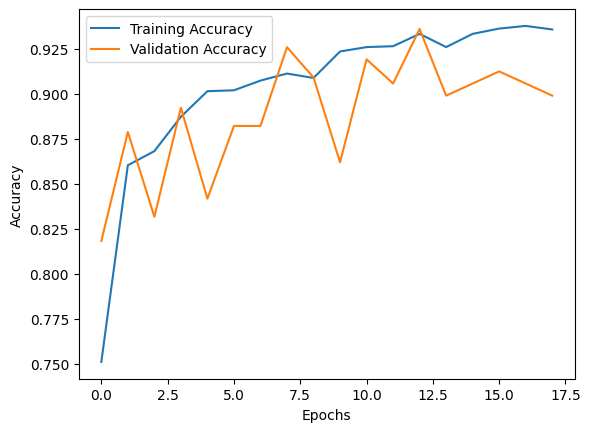

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
{'bette': '0.01%', 'gotu': '99.98%', 'kole': '0.00%'}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image


train_dir = r"C:\Users\asus\Desktop\MiniProject4\dataset\train"
validation_dir = r"C:\Users\asus\Desktop\MiniProject4\dataset\validation"


train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5)


def lr_scheduler(epoch, lr):
    return lr * 0.95


callbacks = [
    early_stopping,
    LearningRateScheduler(lr_scheduler),
    ModelCheckpoint('arecanut_cnn_model.keras', save_best_only=True)
]


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=callbacks
)


test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc:.2f}")


model.save('arecanut_cnn_model.keras')


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    predictions = model.predict(img_array)
    categories = ['good quality', 'kari gotu', 'ulli']
    
    
    return {categories[i]: f'{prob * 100:.2f}%' for i, prob in enumerate(predictions[0])}




In [11]:
# Example usage of the prediction function
img_path = r"C:\Users\asus\Desktop\MiniProject4\dataset\test\image3.jpg"
prediction = predict_image(img_path)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
{'bette': '0.01%', 'gotu': '99.98%', 'kole': '0.00%'}
